In [15]:
%tensorflow_version 2.x

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [16]:
dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [17]:
(_, ANCHO_IMAGEN, ALTURA_IMAGEN) = x_train.shape
CHANNELS = 1

# print('ancho:', ANCHO_IMAGEN);
# print('alto:', ALTURA_IMAGEN);
# print('channels:', CHANNELS);

x_train_with_chanels = x_train.reshape( x_train.shape[0], ANCHO_IMAGEN, ALTURA_IMAGEN, CHANNELS )
x_test_with_chanels = x_test.reshape( x_test.shape[0], ANCHO_IMAGEN, ALTURA_IMAGEN, CHANNELS )



In [18]:
#NORMALIZAR DATOS
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [19]:
modelo = tf.keras.models.Sequential()

modelo.add(tf.keras.layers.Convolution2D(   input_shape=(ANCHO_IMAGEN, ALTURA_IMAGEN, CHANNELS),
                                            kernel_size=5,
                                            filters=8,
                                            strides=1,
                                            activation=tf.keras.activations.relu,
                                            kernel_initializer=tf.keras.initializers.VarianceScaling() ))

modelo.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                        strides=(2, 2) ))

modelo.add(tf.keras.layers.Convolution2D(   kernel_size=5,
                                            filters=16,
                                            strides=1,
                                            activation=tf.keras.activations.relu,
                                            kernel_initializer=tf.keras.initializers.VarianceScaling() ))

modelo.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                        strides=(2, 2) ))

modelo.add(tf.keras.layers.Flatten())

modelo.add(tf.keras.layers.Dense(units=128,
                                 activation=tf.keras.activations.relu ));

modelo.add(tf.keras.layers.Dropout(0.2))

modelo.add(tf.keras.layers.Dense(   units=10,
                                    activation=tf.keras.activations.softmax,
                                    kernel_initializer=tf.keras.initializers.VarianceScaling() ))

In [ ]:
tf.keras.utils.plot_model(
                            modelo,
                            show_shapes=True,
                            show_layer_names=True, )

In [21]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

modelo.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [22]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = modelo.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2088 - accuracy: 0.9360 - val_loss: 0.0581 - val_accuracy: 0.9834
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0672 - accuracy: 0.9794 - val_loss: 0.0414 - val_accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.0335 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.0296 - val_accuracy: 0.9906
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0384 - val_accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0297 - val_accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0305 -

In [23]:
train = modelo.evaluate(x_train_normalized, y_train)

1875/1875 [==============================] - 10s 6ms/step - loss: 0.0082 - accuracy: 0.9972


In [24]:
print('PRECISION FINAL: ', train[1])

PRECISION FINAL:  0.9971833229064941


In [25]:
predict = modelo.predict([x_test_normalized])

In [28]:
predictions = np.argmax(predict, axis=1)

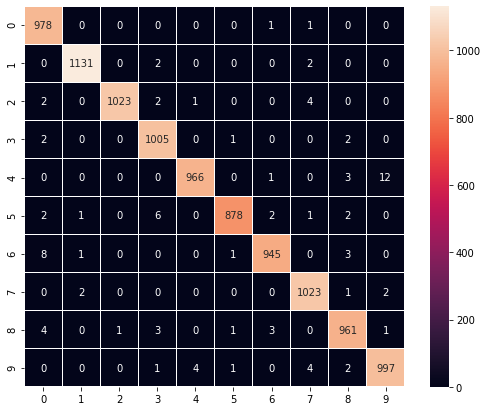

In [29]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()